# Lab 2 : Avocado Sales

In [58]:
import pandas as pd
avocados = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\GSB-544-2\avocado-updated-2020.csv")
avocados.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### 1. Breifly describe the data set. What information does it contain? 
This dataset contains information about Avacados from the HAAS Avacado Board. The dataset features prices of avocados, the total sales volume, the total bags and size of bags, type of avocado and the year and geography for avocados. 


### 2. Clean the data in any way you see fit. 

In [59]:
# find how many unique variables are in geography
print(avocados["geography"].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester'
 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville' 'Miami/Ft. Lauderdale'
 'Midsouth' 'Nashville' 'New Orleans/Mobile' 'New York' 'Northeast'
 'Northern New England' 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh'
 'Plains' 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke'
 'Sacramento' 'San Diego' 'San Francisco' 'Seattle' 'South Carolina'
 'South Central' 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa'
 'Total U.S.' 'West' 'West Tex/New Mexico']
['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester'
 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranto

In [60]:
# clean data
# rename sizes for avocados
avocados = avocados.rename(columns = {"4046":"small", "4225":"large", "4770":"extralarge"})
# data set with major regions
major_regions = {
    "West": "West", 
    "Great Lakes": "Great Lakes",
    "Midsouth": "Midsouth", 
    "Northeast": "Northeast", 
    "South Central": "South Central", 
    "Southeast": "Southeast", 
    "West Tex/New Mexico": "West Tex/New Mexico", 
    "Plains": "Plains", 
    "Northern New England": "Northern New England",
    "California": "California",
    "New York": "New York", 
    # "Total U.S.": "Total U.S."
    }
# data set with minor regions
minor_regions = { 
    "South Carolina": "South Carolina",  
    "Albany": "Albany",
    "Atlanta": "Atlanta", 
    'Baltimore/Washington': 'Baltimore/Washington', 
    'Boise': 'Boise', 
    'Boston': 'Boston', 
    'Buffalo/Rochester': 'Buffalo/Rochester', 
    'Charlotte': 'Charlotte', 
    'Chicago': 'Chicago', 
    'Cincinnati/Dayton': 'Cincinnati/Dayton', 
    'Columbus': 'Columbus', 
    'Dallas/Ft. Worth': 'Dallas/Ft. Worth',  
    'Denver': 'Denver', 
    'Detroit': 'Detroit', 
    'Grand Rapids': 'Grand Rapids', 
    'Harrisburg/Scranton': 'Harrisburg/Scranton', 
    'Hartford/Springfield': 'Hartford/Springfield', 
    'Houston': 'Houston', 
    'Indianapolis': 'Indianapolis', 
    'Jacksonville': 'Jacksonville', 
    'Las Vegas': 'Las Vegas', 
    'Los Angeles': 'Los Angeles', 
    'Louisville': 'Louisville', 
    'Miami/Ft. Lauderdale': 'Miami/Ft. Lauderdale', 
    'Nashville': 'Nashville', 
    'New Orleans/Mobile': 'New Orleans/Mobile', 
    'Orlando': 'Orlando', 
    'Philadelphia': 'Philadelphia',
    'Phoenix/Tucson': 'Phoenix/Tucson', 
    'Pittsburgh': 'Pittsburgh', 
    'Portland': 'Portland', 
    'Raleigh/Greensboro': 'Raleigh/Greensboro', 
    'Richmond/Norfolk': 'Richmond/Norfolk', 
    'Roanoke': 'Roanoke', 
    'Sacramento': 'Sacramento',
    'San Diego': 'San Diego', 
    'San Francisco': 'San Francisco', 
    'Seattle': 'Seattle', 
    'Spokane': 'Spokane', 
    'St. Louis': 'St. Louis', 
    'Syracuse': 'Syracuse', 
    'Tampa': 'Tampa'
    }
avocados["major_regions"] = avocados["geography"].map(major_regions)
avocados["minor_regions"] = avocados["geography"].map(minor_regions)
avocados.head()

# Resource used to understand how mapping effects variables: https://www.geeksforgeeks.org/python-map-function/

,date,average_price,total_volume,small,large,extralarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,major_regions,minor_regions
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,NaN,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,NaN,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,NaN,Baltimore/Washington


### 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [61]:
# major region with most organic, small Hass avocados in 2017
avocados2017 = avocados[(avocados["year"] == 2017) & (avocados["type"] == "organic")]
major_region_sales = avocados2017.groupby("major_regions")["small"].sum()
top_major_region = major_region_sales.idxmax()
most_sales = major_region_sales.max()
print(f"{top_major_region} {most_sales}")

# Resource used to utilize idxmax() function: https://www.statology.org/idxmax-pandas/#:~:text=You%20can%20use%20the%20pandas.DataFrame.idxmax()%20function%20to%20return%20the%20index

West 1870206.29
West 1870206.29


The West is the major geographical region that sold the most total organic, small Hass avocados in 2017. 

### 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [62]:
avocados["date"] = pd.to_datetime(avocados["date"])
avocados["day"] = avocados["date"].dt.day
avocados["month"] = avocados["date"].dt.month
avocados["year"] = avocados["date"].dt.year
avocados.head()
highest_month = avocados.groupby("month")["total_volume"].mean()
highestmonth = highest_month.idxmax()
print(highestmonth)

5
5


The month with the highest average volume of avocado sales is May. 

### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for total_volume variable.

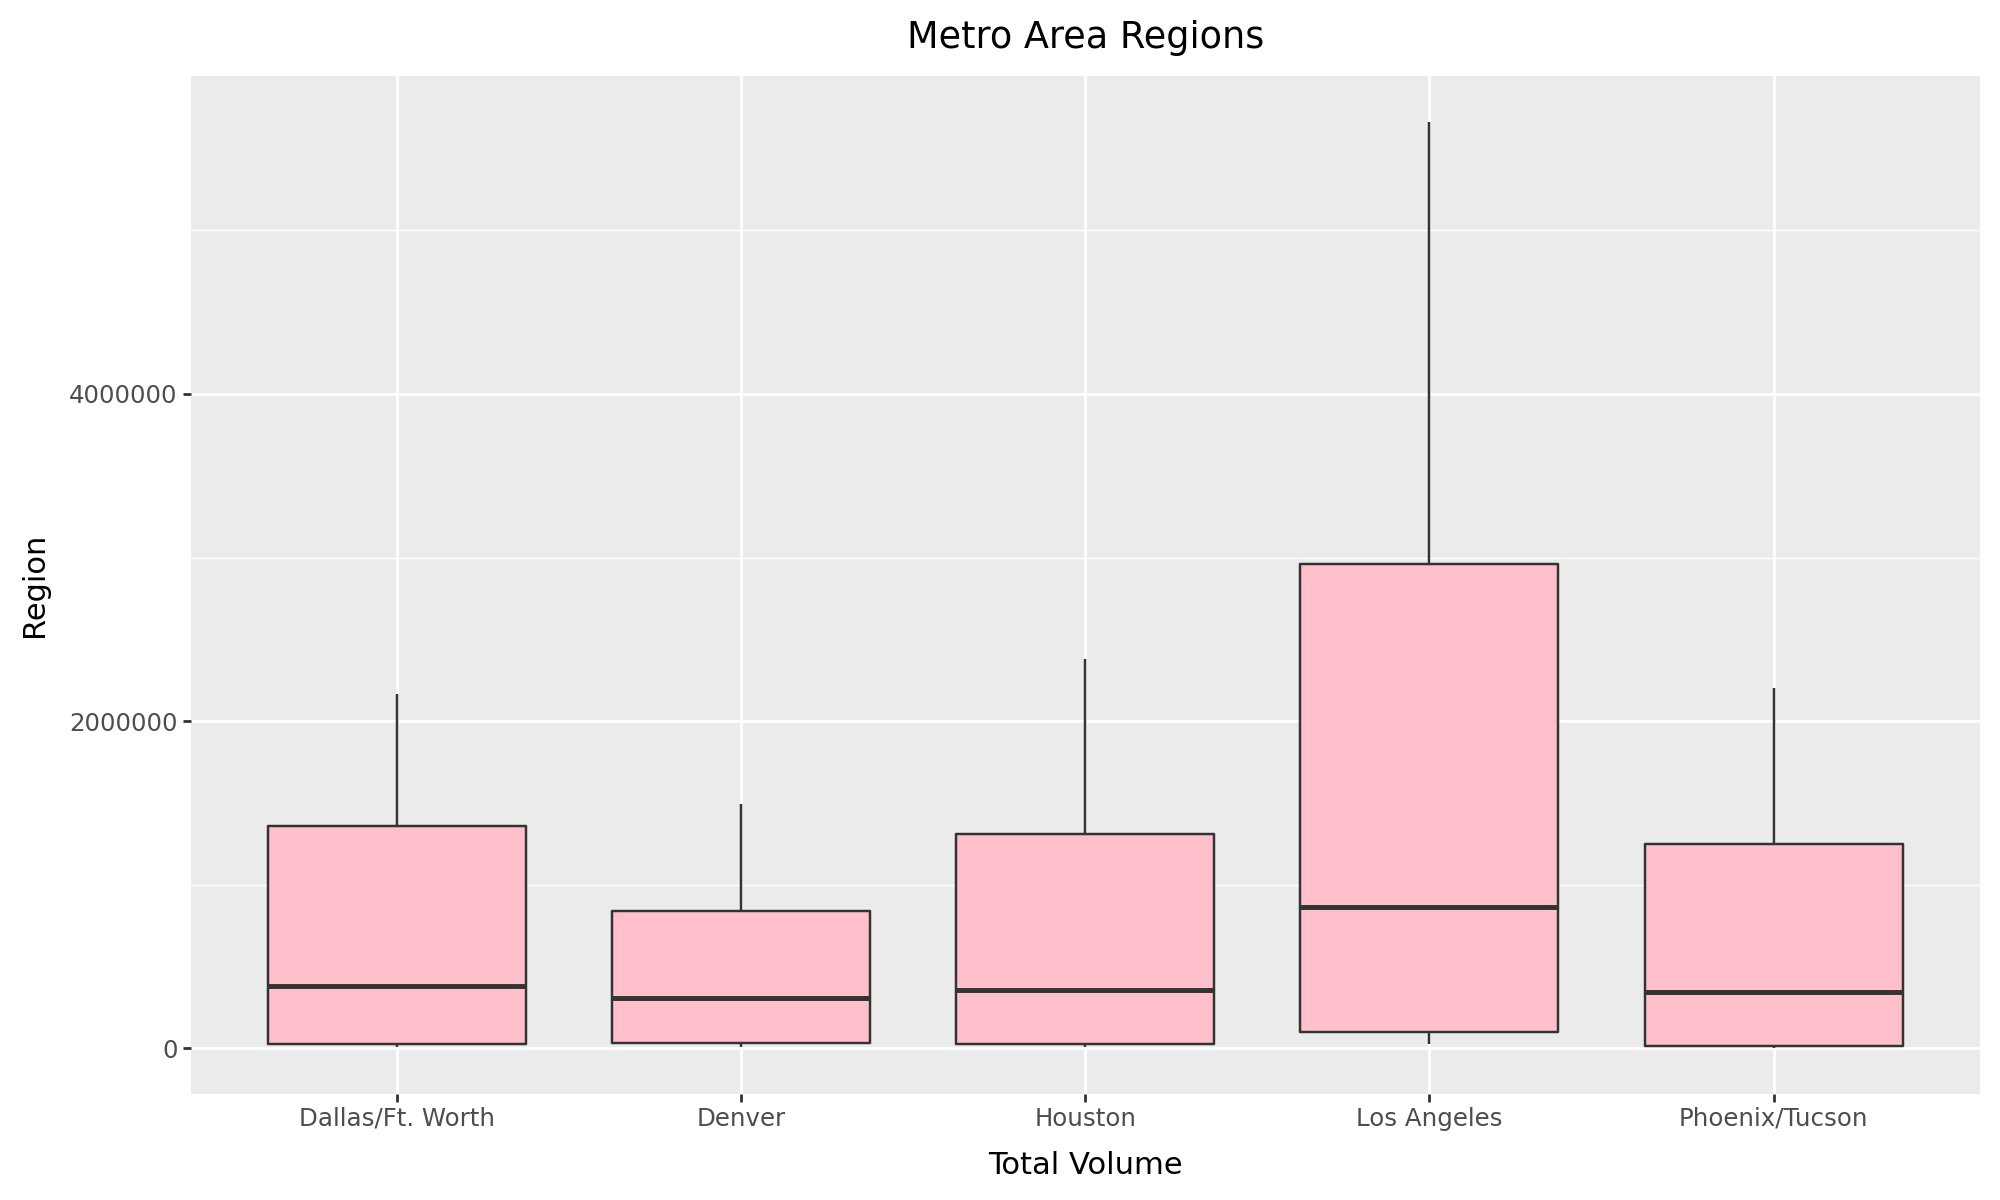

In [63]:
from plotnine import *

metro = (
    avocados.groupby("minor_regions")
    .agg(mean_vol = ("total_volume", "mean"))
    .nlargest(5, "mean_vol")
    .reset_index()
)
avocados_metro = avocados[avocados["minor_regions"].isin(metro["minor_regions"])]
(ggplot(
    avocados_metro, aes(x = "minor_regions", y = "total_volume"))
    + geom_boxplot(fill = "pink")
    + labs(x = "Total Volume", y = "Region", title = "Metro Area Regions")
    + theme(figure_size = (10, 6))
)

### 6. From your cleaned data set, create a data set with only these California regions (San Francisco, Sacramento, Los Angeles, San Diego) and answer the following questions about these California regions only. 

In [ ]:
avocados_california

### 7. In which California regions is the price or organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

### 9. Using outside data

### Appendix and References
https://www.kaggle.com/datasets/timmate/avocado-prices-2020?resource=download&select=avocado-updated-2020.csv